In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/database_finance'

In [ ]:
import os

In [ ]:
ticker = "QCOM"

In [ ]:
folder_path = os.path.join(base_path, ticker)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your file
file_path = f"/content/drive/MyDrive/database_finance/{ticker}/technicals/{ticker}_technicals.csv"

# Load the CSV with multi-index columns
df = pd.read_csv(file_path, header=[0,1], index_col=0, parse_dates=True)

# Optional: Show column names to check structure
print(df.columns)

# Assuming column names are like ('Bollinger Band Upper', 'NVDA') etc.


MultiIndex([(                    'McClellan Oscillator',      'QCOM'),
            (                    'McClellan Oscillator', 'Benchmark'),
            (                   'Advancers - Decliners',      'QCOM'),
            (                   'Advancers - Decliners', 'Benchmark'),
            (                       'On-Balance Volume',      'QCOM'),
            (                       'On-Balance Volume', 'Benchmark'),
            (          'Accumulation/Distribution Line',      'QCOM'),
            (          'Accumulation/Distribution Line', 'Benchmark'),
            (                      'Chaikin Oscillator',      'QCOM'),
            (                      'Chaikin Oscillator', 'Benchmark'),
            (                        'Money Flow Index',      'QCOM'),
            (                        'Money Flow Index', 'Benchmark'),
            (                             'Williams %R',      'QCOM'),
            (                             'Williams %R', 'Benchmark'),
      

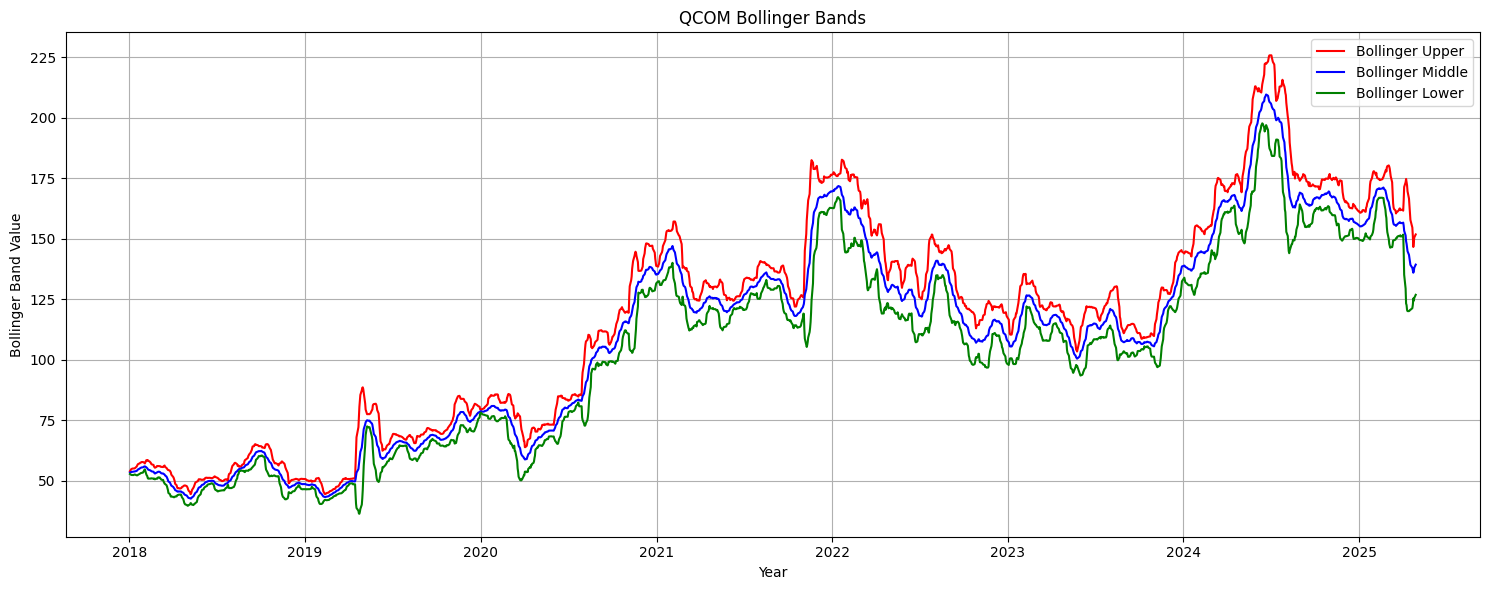

In [ ]:
# Extract Bollinger Band columns for NVDA
upper = df[('Bollinger Band Upper', f"{ticker}")]
lower = df[('Bollinger Band Lower', f"{ticker}")]
middle = df[('Bollinger Band Middle', f"{ticker}")]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index, upper, label='Bollinger Upper', color='red')
plt.plot(df.index, middle, label='Bollinger Middle', color='blue')
plt.plot(df.index, lower, label='Bollinger Lower', color='green')
plt.title(f"{ticker} Bollinger Bands")
plt.xlabel('Year')
plt.ylabel('Bollinger Band Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


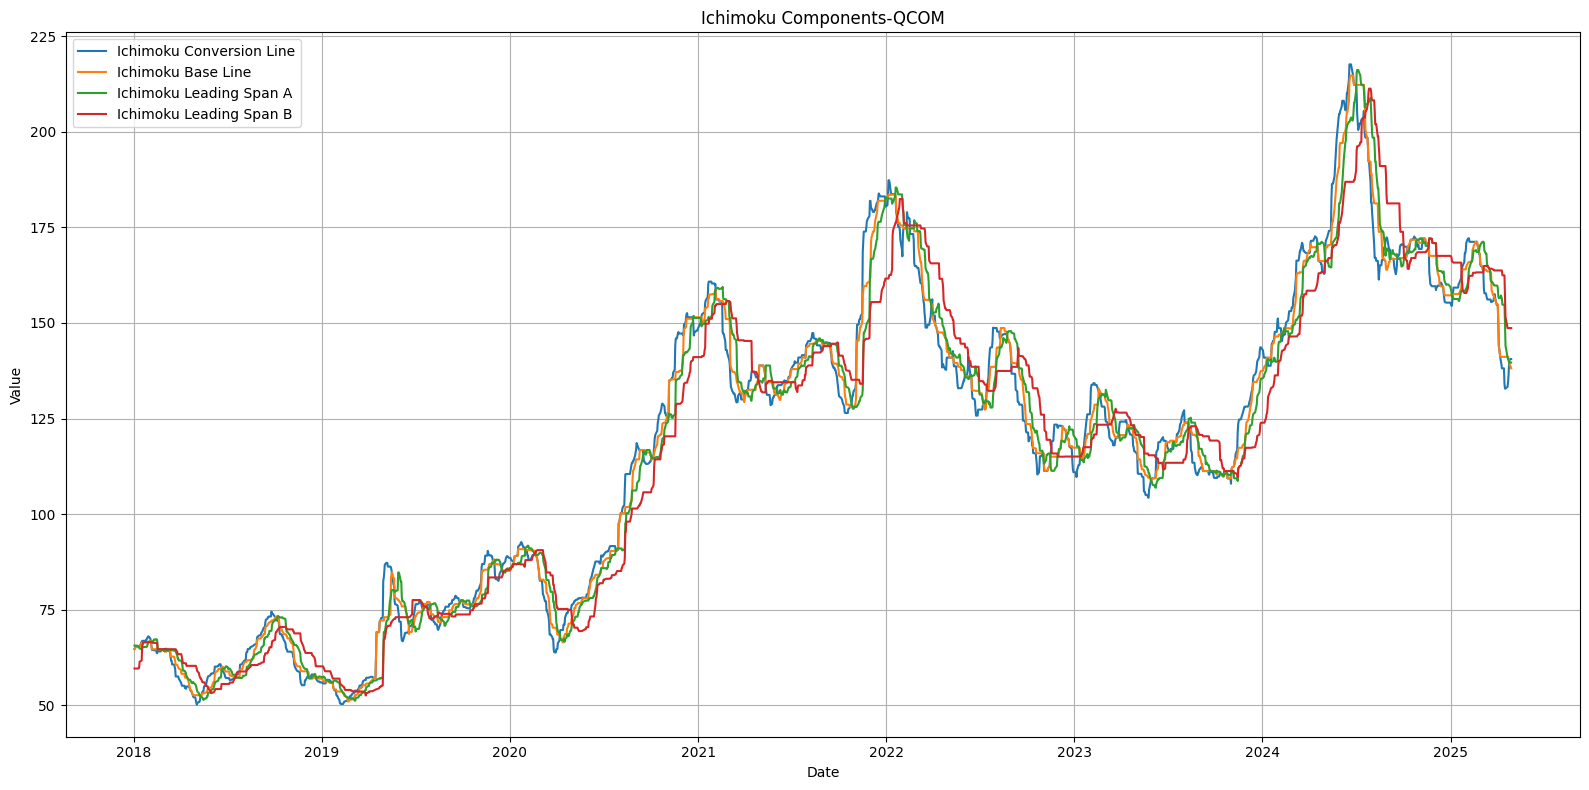

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file_path = f"/content/drive/MyDrive/database_finance/{ticker}/technicals/{ticker}_technicals.csv"
df = pd.read_csv(file_path, header=[0,1], index_col=0, parse_dates=True)

# Select Ichimoku components for NVDA only
ichimoku_columns_nvda = [
    ('Ichimoku Conversion Line', f"{ticker}"),
    ('Ichimoku Base Line', f"{ticker}"),
    ('Ichimoku Leading Span A', f"{ticker}"),
    ('Ichimoku Leading Span B', f"{ticker}"),
]

# Plot
plt.figure(figsize=(16, 8))
for col in ichimoku_columns_nvda:
    plt.plot(df.index, df[col], label=col[0])

plt.title(f"Ichimoku Components-{ticker}")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
file_path = f"/content/drive/MyDrive/database_finance/{ticker}/technicals/{ticker}_technicals.csv"
df = pd.read_csv(file_path, header=[0,1], index_col=0, parse_dates=True)




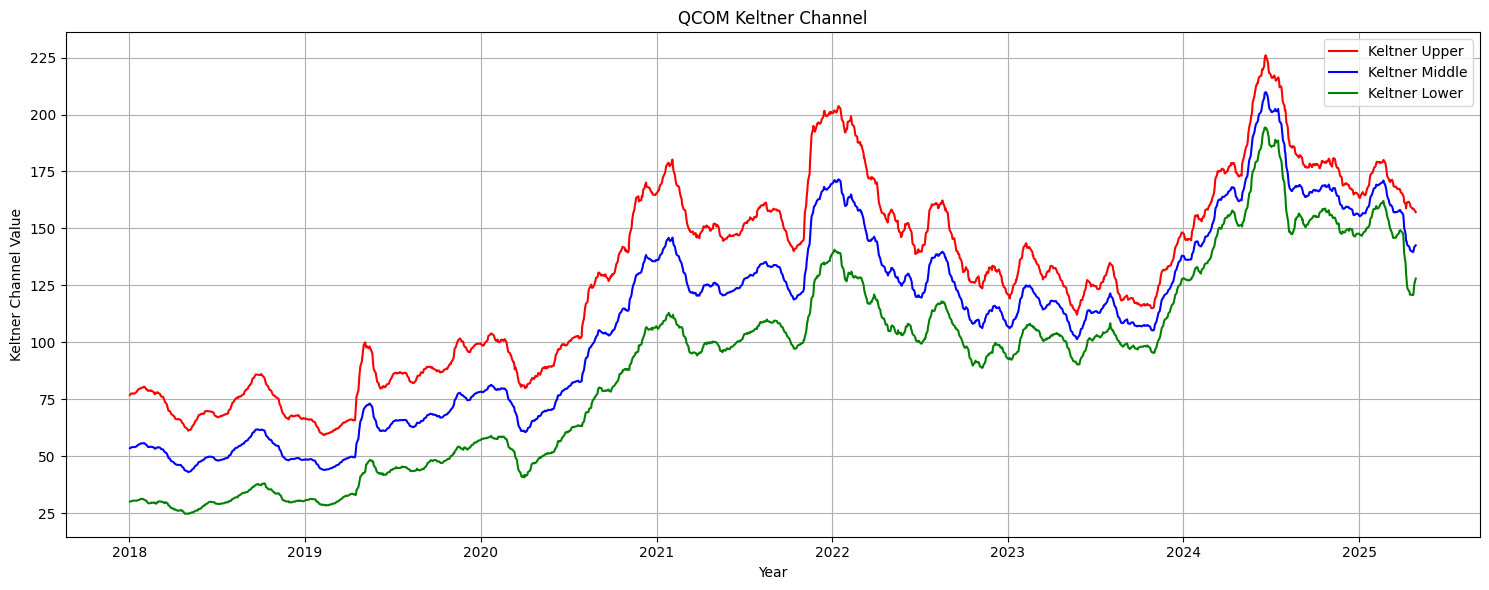

In [ ]:
# Extract Bollinger Band columns for NVDA
upper = df[('Keltner Channel Upper', f"{ticker}")]
lower = df[('Keltner Channel Lower', f"{ticker}")]
middle = df[('Keltner Channel Middle', f"{ticker}")]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index, upper, label='Keltner Upper', color='red')
plt.plot(df.index, middle, label='Keltner Middle', color='blue')
plt.plot(df.index, lower, label='Keltner Lower', color='green')
plt.title(f"{ticker} Keltner Channel")
plt.xlabel('Year')
plt.ylabel('Keltner Channel Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


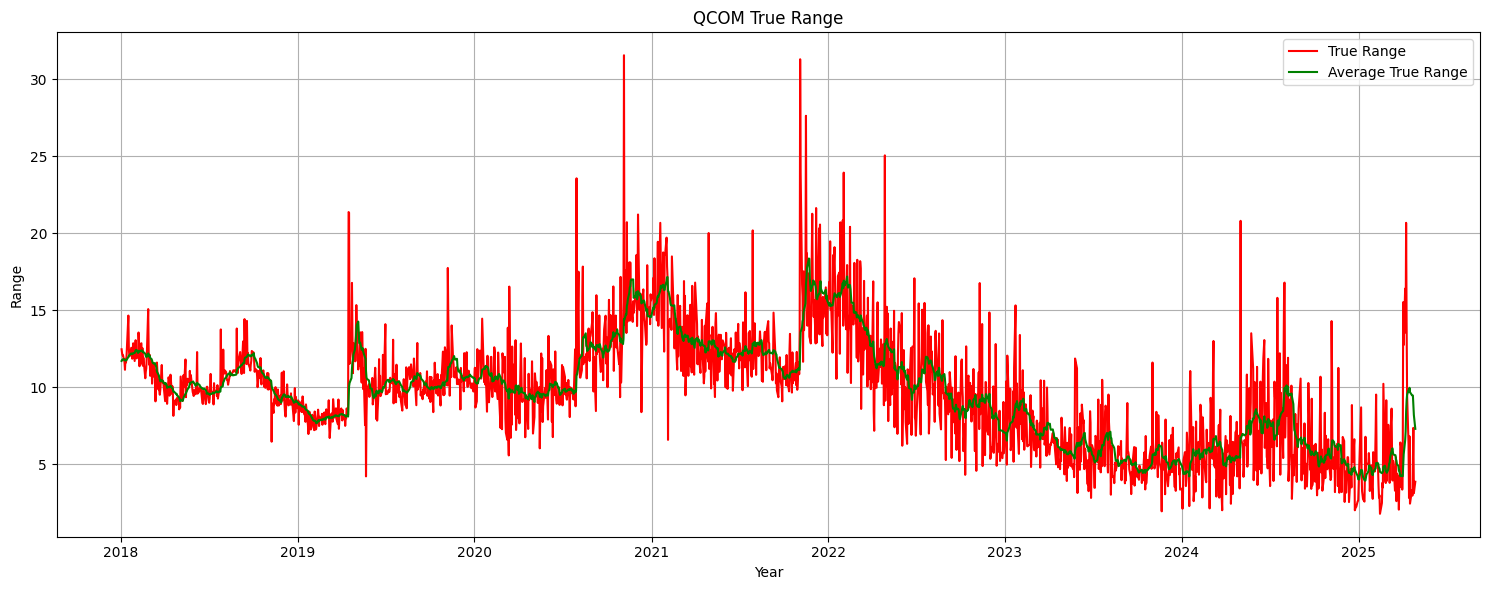

In [ ]:
# Extract Bollinger Band columns for NVDA
upper = df[('True Range', f"{ticker}")]
lower = df[('Average True Range', f"{ticker}")]
# middle = df[('Keltner Channel Middle', 'NVDA')]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index, upper, label='True Range', color='red')
# plt.plot(df.index, middle, label='Average True Range', color='blue')
plt.plot(df.index, lower, label='Average True Range', color='green')
plt.title(f"{ticker} True Range")
plt.xlabel('Year')
plt.ylabel('Range')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


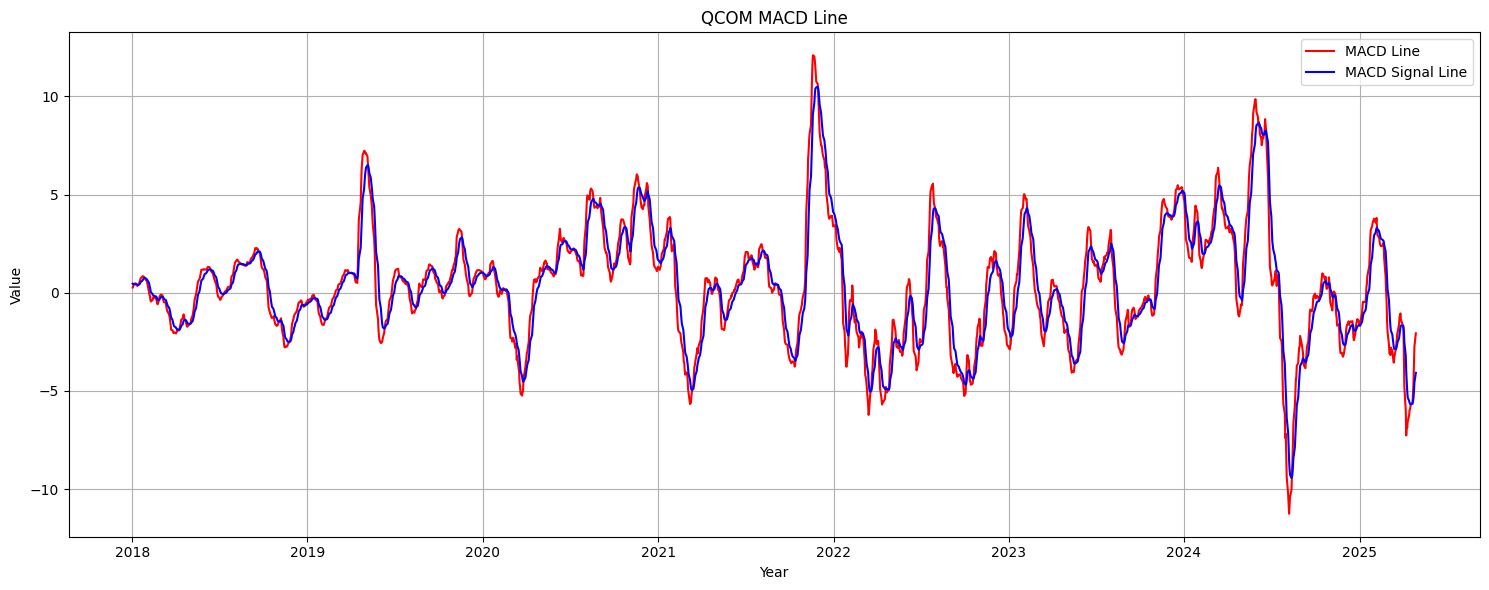

In [ ]:
# Extract Bollinger Band columns for NVDA
upper = df[('MACD Line', f"{ticker}")]
lower = df[('MACD Signal Line', f"{ticker}")]
# middle = df[('Keltner Channel Middle', 'NVDA')]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(df.index, upper, label='MACD Line', color='red')
plt.plot(df.index, lower, label='MACD Signal Line', color='blue')
# plt.plot(df.index, lower, label='Keltner Lower', color='green')
plt.title(f"{ticker} MACD Line")
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cumulative_returns_from_csv(
            ticker_symbol: str,
            period: str = "yearly"  # placeholder, but not used here
        ) -> str:
        """
        Plot the cumulative returns for a given ticker symbol using offline CSV data.
        """
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/historical_data/{ticker_symbol}_historical_data.csv"
        # Step 1: Read CSV with multi-row headers
        df = pd.read_csv(csv_file_path, header=[0, 1], index_col=0)

        # Convert index to datetime
        df.index = pd.to_datetime(df.index)

        # Extract Cumulative Return for ticker and benchmark
        try:
            ticker_return = df[("Cumulative Return", ticker_symbol)]
            benchmark_return = df[("Cumulative Return", "Benchmark")]
        except KeyError:
            raise ValueError("Cumulative Return data not available for given ticker and/or benchmark.")

        # Plot both series
        plt.figure(figsize=(15, 5))
        ticker_return.plot(
            label=ticker_symbol,
            linestyle="-",
            linewidth=2
        )
        benchmark_return.plot(
            label="Benchmark",
            linestyle="--",
            linewidth=2
        )

        plt.title(f"Cumulative Returns of {ticker_symbol} vs Benchmark")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.grid(True)
        plt.legend()

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save plot
        plot_path = f"static/images/cumulative_returns.png"
        plt.savefig(plot_path)
        plt.close()

        return plot_path


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def plot_cumulative_returns_from_csv(ticker_symbol: str, period: str = "yearly") -> str:
    """
    Plot the cumulative returns for a given ticker symbol using offline CSV data and S&P 500 as benchmark.
    """
    csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/historical_data/{ticker_symbol}_historical_data.csv"
    df = pd.read_csv(csv_file_path, header=[0, 1], index_col=0)
    df.index = pd.to_datetime(df.index)

    # Extract ticker's cumulative return
    try:
        ticker_return = df[("Cumulative Return", ticker_symbol)]
    except KeyError:
        raise ValueError("Ticker cumulative return not available.")

    # Download S&P 500 data (using "^GSPC" ticker)
    sp500 = yf.download("^GSPC", start=df.index.min().strftime('%Y-%m-%d'), end=df.index.max().strftime('%Y-%m-%d'),auto_adjust=False)
    sp500 = sp500["Adj Close"].pct_change().fillna(0)
    sp500_cumulative = (1 + sp500).cumprod()
    sp500_cumulative.index = pd.to_datetime(sp500_cumulative.index)

    # Align S&P 500 to your data's date index
    sp500_cumulative = sp500_cumulative.reindex(df.index).fillna(method="ffill")

    # Plot
    plt.figure(figsize=(15, 5))
    ticker_return.plot(label=ticker_symbol, linestyle="-", linewidth=2)
    sp500_cumulative.plot(label="S&P 500", linestyle="--", linewidth=2)

    plt.title(f"Cumulative Returns: {ticker_symbol} vs S&P 500")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.legend()
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Save plot
    plot_path = f"static/images/cumulative_returns.png"
    plt.savefig(plot_path)
    plt.close()

    return plot_path


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def plot_cumulative_returns_from_csv(ticker_symbol: str, period: str = "yearly") -> str:
    """
    Plot cumulative returns of ticker, benchmark (from CSV), and S&P 500 (from Yahoo Finance) on a single plot with proper legend.
    """
    csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/historical_data/{ticker_symbol}_historical_data.csv"

    # Load CSV with multi-level headers
    df = pd.read_csv(csv_file_path, header=[0, 1], index_col=0)
    df.index = pd.to_datetime(df.index)

    # --- Extract Ticker Return ---
    try:
        ticker_return = df[("Cumulative Return", ticker_symbol)]
    except KeyError:
        raise ValueError(f"Cumulative Return for {ticker_symbol} not found.")

    # --- Extract Benchmark Return if exists ---
    try:
        benchmark_return = df[("Cumulative Return", "Benchmark")]
    except KeyError:
        benchmark_return = None

    # --- Download and compute S&P 500 cumulative return ---
    sp500_data = yf.download("^GSPC", start=df.index.min().strftime('%Y-%m-%d'), end=df.index.max().strftime('%Y-%m-%d'),auto_adjust=False)
    sp500_pct_return = sp500_data["Adj Close"].pct_change().fillna(0)
    sp500_cum_return = (1 + sp500_pct_return).cumprod()
    sp500_cum_return = sp500_cum_return.reindex(df.index).fillna(method="ffill")

    # --- Plot all on the same Axes ---
    plt.figure(figsize=(15, 5))
    ax = plt.gca()  # get current axes

    ticker_return.plot(ax=ax, label=ticker_symbol, linestyle="-", linewidth=2)
    if benchmark_return is not None:
        benchmark_return.plot(ax=ax, label="Benchmark", linestyle="--", linewidth=2)
    sp500_cum_return.plot(ax=ax, label="S&P 500", linestyle=":", linewidth=2)

    # Formatting
    plt.title(f"Cumulative Returns: {ticker_symbol} vs Benchmark vs S&P 500")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.legend()  # ✅ Only call once, after all plots
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Save plot
    plot_path = "static/images/cumulative_returns.png"
    plt.savefig(plot_path)
    plt.close()

    return plot_path


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-753873046.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_cum_return = sp500_cum_return.reindex(df.index).fillna(method="ffill")


FileNotFoundError: [Errno 2] No such file or directory: 'static/images/cumulative_returns.png'

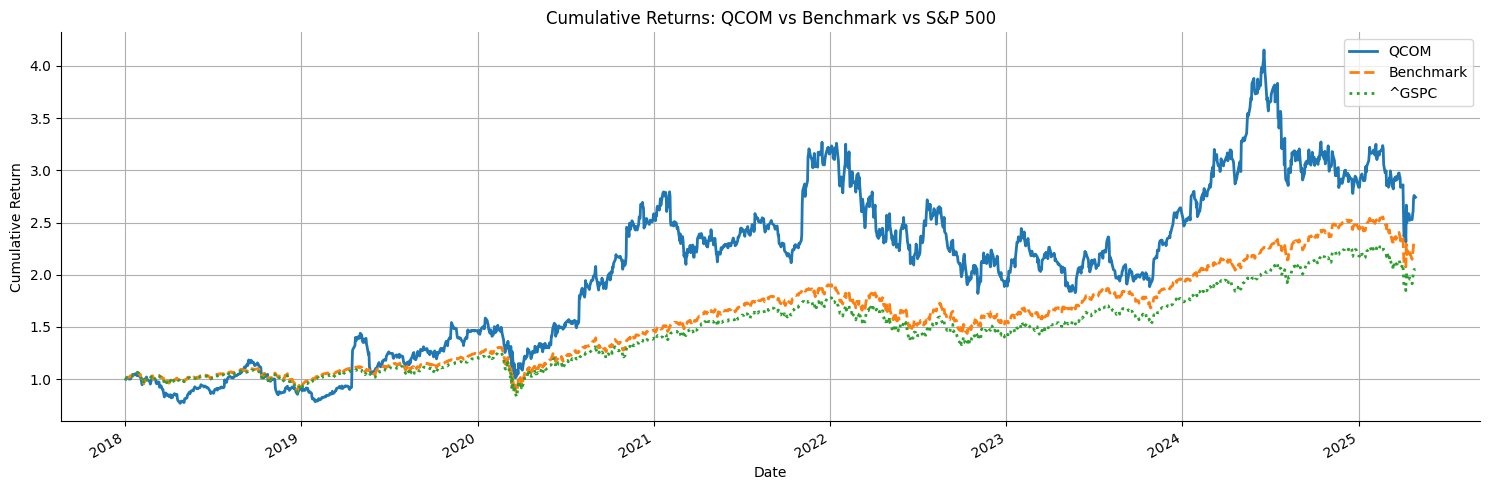

In [ ]:
plot_cumulative_returns_from_csv("QCOM")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_shareholder_equity_from_csv(
            # csv_file_path: str,
            ticker_symbol: str  # kept for compatibility, not used here
        ) -> str:
        """
        Plot the Total Shareholder Equity from offline CSV (transposed) for 2021 to 2025 (if available).
        """
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/balance_sheet_statement/{ticker_symbol}_balance_sheet_statement.csv"
        # Read the CSV
        df = pd.read_csv(csv_file_path, index_col=0)

        # Clean index
        df.index = df.index.str.strip()

        # Check if "Total Shareholder Equity" exists
        if "Total Shareholder Equity" not in df.index:
            raise ValueError(f"'Total Shareholder Equity' not found in CSV.")

        # Extract Total Shareholder Equity row and transpose
        shareholder_value = df.loc["Total Shareholder Equity"].T
        shareholder_value.index.name = "Year"
        shareholder_value.name = ticker_symbol

        # Filter only 2022 onward if needed (optional)
        shareholder_value = shareholder_value.loc[shareholder_value.index.astype(str) >= "2021"]

        # Check for empty data
        if shareholder_value.empty:
            raise ValueError(f"No Total Shareholder Equity data available for {ticker_symbol} from 2021 onward.")

        # Plot
        plt.figure(figsize=(15, 3))
        shareholder_value.plot.bar(
            title=f"Total Shareholder Equity for {ticker_symbol} in last years",
            grid=True,
            color='skyblue',
            rot=0
        )

        plt.xlabel("Year")
        plt.ylabel("Total Shareholder Equity")
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = f"static/images/shareholder_equity.png"
        plt.savefig(plot_path)
        plt.close()

        return plot_path


FileNotFoundError: [Errno 2] No such file or directory: 'static/images/shareholder_equity.png'

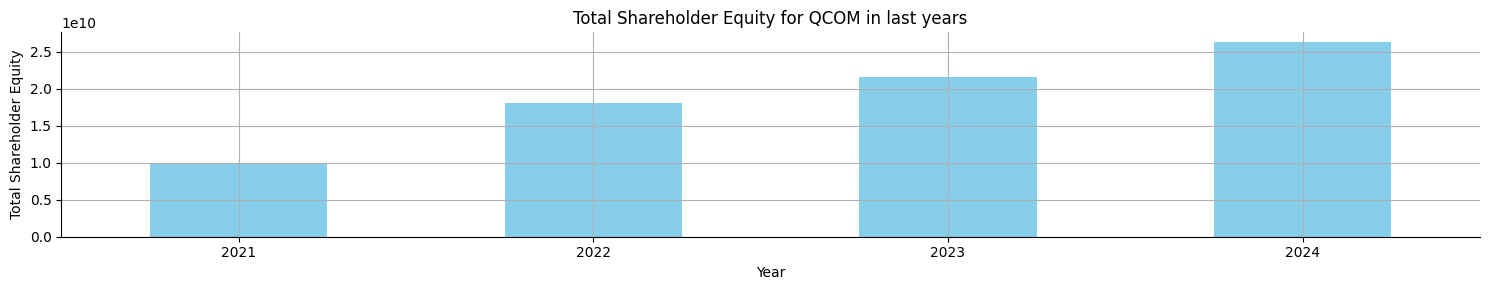

In [ ]:
plot_shareholder_equity_from_csv("QCOM")

In [ ]:
def plot_revenue(
        ticker_symbol: str
    ) -> str:
        """
        Fetch and plot the revanue for a given ticker symbol over the specified period.
        """
        # Fetch the balance sheet data for the specified ticker\
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/income_statement/{ticker_symbol}_income_statement.csv"
        # Read the CSV
        df = pd.read_csv(csv_file_path, index_col=0)
        # Clean index
        df.index = df.index.str.strip()
        # Check if "Revenue" exists
        if "Revenue" not in df.index:
            raise ValueError(f"'Revenue' not found in CSV.")
        # Extract Revenue row and transpose
        income_statment = df.loc["Revenue"].T.dropna()
        income_statment.index.name = "Year"
        income_statment.name = ticker_symbol
        # Filter only 2022 onward if needed (optional)
        income_statment = income_statment.loc[income_statment.index.astype(str) >= "2021"]
        # Check for empty data
        if income_statment.empty:
            raise ValueError(f"No Trailing revanue data available for ticker {ticker_symbol} in 2022.")
        # Prepare the data for plotting
        income_statment.columns = [ticker_symbol]


        # Plot the data
        plt.figure(figsize=(15, 3))
        income_statment.plot(
            title=f"4 Year Trailing Revenue for {ticker_symbol} ",
            grid=True,
            linestyle="-",
            linewidth=2,
            xlabel="Date",
            ylabel="Revanue",

        )



        # Style adjustments
        plt.gca().spines["top"].set_visible(False)  # Hide top spine
        plt.gca().spines["right"].set_visible(False)  # Hide right spine
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = f"static/images/trailing_revanue.png"
        plt.savefig(plot_path)
        plt.close()

        return plot_path

FileNotFoundError: [Errno 2] No such file or directory: 'static/images/trailing_revanue.png'

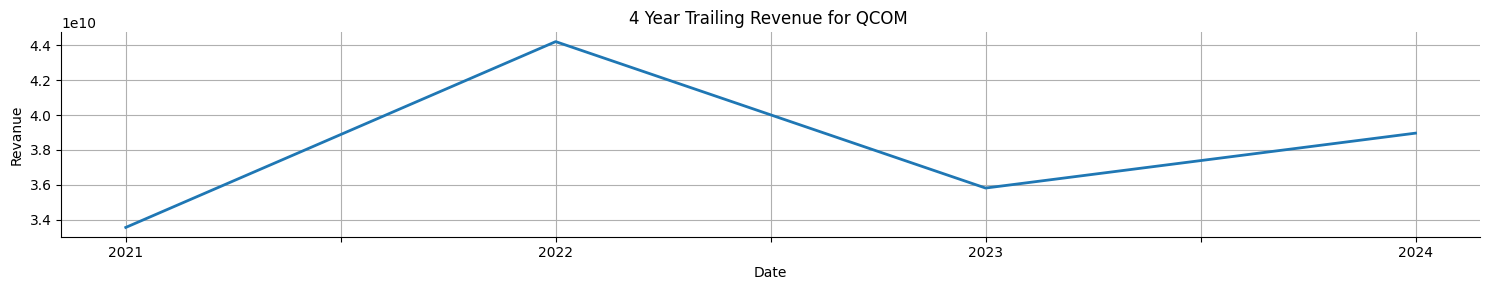

In [ ]:
plot_revenue("QCOM")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def get_revenue_growth(ticker_symbol: str) -> str:
    """
    Read revenue from downloaded CSV and plot year-over-year revenue growth.
    """

    # Load offline CSV
    csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/income_statement/{ticker_symbol}_income_statement.csv"
    df = pd.read_csv(csv_file_path, index_col=0)
    df.index = df.index.str.strip()  # Clean index

    # Extract Revenue row
    revenue = df.loc["Revenue", :].T.dropna()
    revenue.name = "Revenue"

    if revenue.empty:
        raise ValueError(f"No Revenue data available for ticker {ticker_symbol}.")

    # Calculate growth manually (percentage change)
    revenue_growth = revenue.pct_change() * 100  # Growth in %
    revenue_growth = revenue_growth.dropna()

    if revenue_growth.empty:
        raise ValueError(f"Not enough data to compute revenue growth for {ticker_symbol}.")

    # Plotting
    plt.figure(figsize=(12, 4))
    revenue_growth.plot(
        title=f"Year-over-Year Revenue Growth for {ticker_symbol}",
        grid=True,
        linestyle="-",
        marker="o",
        linewidth=2,
        xlabel="Year",
        ylabel="Revenue Growth (%)",
        color="blue"
    )

    # Style adjustments
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Save plot
    plot_path = f"{ticker_symbol}_revenue_growth.png"
    plt.savefig(plot_path)
    plt.close()

    return f"Revenue growth plot saved to <img src='{plot_path}'>"


In [ ]:
get_revenue_growth("QCOM")

"Revenue growth plot saved to <img src='QCOM_revenue_growth.png'>"

In [ ]:
def get_piotorroski_score(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Plot the Piotorroski score for a single ticker.
        """
        # Fetch the balance sheet data for the specified ticker
        # # companies = get_companies(ticker_symbol)
        # piotroski_score = companies.models.get_piotroski_score()

        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/models/{ticker_symbol}_piotroski_score.csv"
        # Read the CSV
        piotroski_score = pd.read_csv(csv_file_path, index_col=0)
        piotroski_score_value = piotroski_score.loc[
            :, "Piotroski Score", :
        ].T

        if piotroski_score_value.empty:
            raise ValueError(f"No Total Shareholder Equity data available for ticker {ticker_symbol} in 2022.")

        # Prepare the data for plotting
        piotroski_score_value.columns = ticker_symbol

        # Plot the data
        plt.figure(figsize=(15, 3))
        piotroski_score_value.plot.bar(
            title=f"Piotroski Score",
            grid=True,
            colormap="plasma",
            rot=0,
            ylim=(0, 9),
            # ylabel="Piotroski Score",
            # stacked=True,
        )

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)  # Hide top spine
        plt.gca().spines["right"].set_visible(False)  # Hide right spine
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = (
            f"{ticker_symbol}_piotroski_score.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"analyst recomendation chart saved to <img {plot_path}>"

In [ ]:
get_piotorroski_score("QCOM")

IndexingError: Too many indexers

In [ ]:
import os
# import mplfinance as mpf
import pandas as pd
from math import pi, log10

from matplotlib import pyplot as plt
from typing import Annotated, List, Tuple
from pandas import DateOffset
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# from ..data_source.yfinance_utils import YFinanceUtils

# from ..radar_chart.RadarChart import RadarChart

import matplotlib.dates as mdates

In [ ]:
def get_profitability_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key profitability ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        companies = get_companies(ticker_symbol)
        profitability_ratios = companies.ratios.collect_profitability_ratios()


        return_on_rows = [
            "Return on Assets",
            "Return on Equity",
            "Return on Invested Capital",
            "Return on Capital Employed",
            "Return on Tangible Assets"
        ]
        df = profitability_ratios.loc[profitability_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Profitability Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{save_path}/profitability_ratio.png"
            if os.path.isdir(save_path)
            else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Profitability Ratio chart saved at <img {plot_path}>"

In [ ]:
def get_solvency_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the solvency ratios for a given ticker symbol over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_solvency.csv"
        # Read the CSV
        solvency_ratios = pd.read_csv(csv_file_path, index_col=0)


        return_on_rows = [
            "Debt-to-Assets Ratio",
            "Debt-to-Equity Ratio",
            "Net-Debt to EBITDA Ratio"
        ]

        df = solvency_ratios.loc[solvency_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN



        # if solvency_ratios.empty:
        #     return "No solvency ratio data available to plot."

        # Prepare the data for plotting
        # df = solvency_ratios.T.dropna()
        df.index = df.index.astype(str)

        # Plot the data
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)
        plt.title(f"Solvency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = (
            f"{ticker_symbol}_solvency_ratios_I.png"
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Solvency Ratio chart saved at <img {plot_path}>"

In [ ]:
get_solvency_ratios("QCOM")

'Solvency Ratio chart saved at <img QCOM_solvency_ratios_I.png>'

In [ ]:
def get_solvency_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the solvency ratios for a given ticker symbol over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_solvency.csv"
        # Read the CSV
        solvency_ratios = pd.read_csv(csv_file_path, index_col=0)

        return_on_rows = [
            "Cash Flow Coverage Ratio",
            "CAPEX Coverage Ratio",
            "Dividend CAPEX Coverage Ratio"
        ]

        df = solvency_ratios.loc[solvency_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN



        # if solvency_ratios.empty:
        #     return "No solvency ratio data available to plot."

        # Prepare the data for plotting
        # df = solvency_ratios.T.dropna()
        df.index = df.index.astype(str)

        # Plot the data
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)
        plt.title(f"Solvency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = (
            f"{ticker_symbol}_solvency_ratios_II.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Solvency Ratio chart saved at <img {plot_path}>"

In [ ]:
get_solvency_ratios("QCOM")

'Solvency Ratio chart saved at <img QCOM_solvency_ratios_II.png>'

In [ ]:
def get_solvency_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the solvency ratios for a given ticker symbol over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_solvency.csv"
        # Read the CSV
        # companies = pd.read_csv(csv_file_path, index_col=0)
        solvency_ratios = pd.read_csv(csv_file_path, index_col=0)

        return_on_rows = [
            "Equity Multiplier",
            "Free Cash Flow Yield",
            "Debt Service Coverage Ratio"
        ]

        df = solvency_ratios.loc[solvency_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN



        # if solvency_ratios.empty:
        #     return "No solvency ratio data available to plot."

        # Prepare the data for plotting
        # df = solvency_ratios.T.dropna()
        df.index = df.index.astype(str)

        # Plot the data
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)
        plt.title(f"Solvency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path = (
            f"{ticker_symbol}_solvency_ratios_III.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Solvency Ratio chart saved at <img {plot_path}>"

In [ ]:
get_solvency_ratios("QCOM")

'Solvency Ratio chart saved at <img QCOM_solvency_ratios_III.png>'

In [ ]:
def get_liquidity_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the liquidity ratios for a given ticker symbol over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_liquidity.csv"
        # Read the CSV
        # companies = pd.read_csv(csv_file_path, index_col=0)
        liquidity_ratios =  pd.read_csv(csv_file_path, index_col=0)

        # Remove 'Working Capital' row
        liquidity_ratios = liquidity_ratios.drop(index='Working Capital', errors='ignore')

        return_on_rows = [
            "Current Ratio",
            "Quick Ratio",
            "Cash Ratio"
        ]

        df = liquidity_ratios.loc[liquidity_ratios.index.intersection(return_on_rows)]

        # Transpose to get years on x-axis
        # df = liquidity_ratios.T.dropna()  # Remove rows that are all NaN
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Liquidity Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_liquidity_ratios_III.png"
            # if os.path.isdir(save_path)
            # else save_path
        )

        plt.savefig(plot_path)
        plt.close()

        return f"Liquidity Ratio chart saved at <img {plot_path}>"

In [ ]:
get_liquidity_ratios("QCOM")

'Liquidity Ratio chart saved at <img QCOM_liquidity_ratios_III.png>'

In [ ]:
def get_liquidity_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the liquidity ratios for a given ticker symbol over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_liquidity.csv"
        # Read the CSV
        # companies = pd.read_csv(csv_file_path, index_col=0)
        liquidity_ratios = pd.read_csv(csv_file_path, index_col=0)

        # Remove 'Working Capital' row
        liquidity_ratios = liquidity_ratios.drop(index='Working Capital', errors='ignore')

        return_on_rows = [
            "Operating Cash Flow Ratio",
            "Operating Cash Flow to Sales Ratio",
            "Short Term Coverage Ratio"
        ]

        df = liquidity_ratios.loc[liquidity_ratios.index.intersection(return_on_rows)]

        # Transpose to get years on x-axis
        # df = liquidity_ratios.T.dropna()  # Remove rows that are all NaN
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Liquidity Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_liquidity_ratios_II.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Liquidity Ratio chart saved at <img {plot_path}>"

In [ ]:
get_liquidity_ratios("QCOM")

'Liquidity Ratio chart saved at <img QCOM_liquidity_ratios_II.png>'

In [ ]:
def get_valuation_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the rbook value per share for a given ticker symbol over the specified period.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        valuation_ratios = pd.read_csv(csv_file_path, index_col=0)


        # Filter only the rows that start with "Return on"
        return_on_rows = [
            "Price-to-Earnings",
            "Price-to-Book",
            "Price-to-Cash-Flow",
            "Price-to-Free-Cash-Flow"
        ]
        df = valuation_ratios.loc[valuation_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Valuation Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_valuation_ratios_I.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Valuation Ratios chart saved to <img {plot_path}>"

In [ ]:
get_valuation_ratios("QCOM")

'Valuation Ratios chart saved to <img QCOM_valuation_ratios_I.png>'

In [ ]:
def get_valuation_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the rbook value per share for a given ticker symbol over the specified period.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        valuation_ratios = pd.read_csv(csv_file_path, index_col=0)


        # Filter only the rows that start with "Return on"
        return_on_rows = [
            "EV-to-Sales",
            "EV-to-EBIT",
            "EV-to-EBITDA",
            "EV-to-Operating-Cash-Flow"
        ]
        df = valuation_ratios.loc[valuation_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Valuation Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_valuation_ratios_II.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Valuation Ratios chart saved to <img {plot_path}>"

In [ ]:
get_valuation_ratios("QCOM")

'Valuation Ratios chart saved to <img QCOM_valuation_ratios_II.png>'

In [ ]:
def get_efficiency_ratios_II(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key efficiency ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_efficiency.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        efficiency_ratios = pd.read_csv(csv_file_path, index_col=0)


        # Select required rows
        efficiency_rows = [
            "Inventory Turnover Ratio",
            "Accounts Payable Turnover Ratio",
            "Fixed Asset Turnover",
            "Asset Turnover Ratio"
        ]
        df = efficiency_ratios.loc[efficiency_ratios.index.intersection(efficiency_rows)]

        # Transpose
        df = df.T.dropna(how='all')
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Efficiency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Days / Cycle Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_efficiency_ratios_III.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Efficiency Ratio II chart saved at <img {plot_path}>"

In [ ]:
get_efficiency_ratios_II("QCOM")

'Efficiency Ratio II chart saved at <img QCOM_efficiency_ratios_III.png>'

In [ ]:
def get_efficiency_ratios_II(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key efficiency ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_efficiency.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        efficiency_ratios = pd.read_csv(csv_file_path, index_col=0)

        # Select required rows
        efficiency_rows = [
            "SGA-to-Revenue Ratio",
            "Operating Ratio",
            "Cash Conversion Efficiency"
        ]
        df = efficiency_ratios.loc[efficiency_ratios.index.intersection(efficiency_rows)]

        # Transpose
        df = df.T.dropna(how='all')
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Efficiency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Days / Cycle Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_efficiency_ratios_IV.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Efficiency Ratio II chart saved at <img {plot_path}>"

In [ ]:
get_efficiency_ratios_II("QCOM")

'Efficiency Ratio II chart saved at <img QCOM_efficiency_ratios_IV.png>'

In [ ]:
def get_valuation_ratios_II(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the rbook value per share for a given ticker symbol over the specified period.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        valuation_ratios = pd.read_csv(csv_file_path, index_col=0)


        # Filter only the rows that start with "Return on"
        return_on_rows = [
            "Earnings per Share",
            "Revenue per Share",
            "Book Value per Share"
        ]
        df = valuation_ratios.loc[valuation_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Valuation Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_valuation_ratios_V.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Valuation Ratios II chart saved to <img {plot_path}>"

In [ ]:
get_valuation_ratios_II("QCOM")

'Valuation Ratios II chart saved to <img QCOM_valuation_ratios_V.png>'

In [ ]:
def get_valuation_ratios_II(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot the rbook value per share for a given ticker symbol over the specified period.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        # companies = pd.read_csv(csv_file_path, index_col=0)
        valuation_ratios = pd.read_csv(csv_file_path, index_col=0)

        # Filter only the rows that start with "Return on"
        return_on_rows = [
            "CAPEX per Share",
            "Earnings Yield",
            "Dividend Payout Ratio",
            "Dividend Yield"
        ]
        df = valuation_ratios.loc[valuation_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Valuation Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_valuation_ratios_VI.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Valuation Ratios II chart saved to <img {plot_path}>"

In [ ]:
get_valuation_ratios_II("QCOM")

'Valuation Ratios II chart saved to <img QCOM_valuation_ratios_VI.png>'

In [ ]:
def get_profitability_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key profitability ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # profitability_ratios = companies.ratios.collect_profitability_ratios()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_profitability.csv"
        profitability_ratios = pd.read_csv(csv_file_path, index_col=0)


        return_on_rows = [
            "Return on Assets",
            "Return on Equity",
            "Return on Invested Capital",
            "Return on Capital Employed",
            "Return on Tangible Assets"
        ]
        df = profitability_ratios.loc[profitability_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Profitability Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_profitability_ratio.png"

        )
        plt.savefig(plot_path)
        plt.close()

        return f"Profitability Ratio chart saved at <img {plot_path}>"

In [ ]:
get_profitability_ratios("QCOM")

'Profitability Ratio chart saved at <img QCOM_profitability_ratio.png>'

In [ ]:
def get_profitability_ratios_II(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key profitability ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # profitability_ratios = companies.ratios.collect_profitability_ratios()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_profitability.csv"
        profitability_ratios = pd.read_csv(csv_file_path, index_col=0)


        return_on_rows = [
            "Gross Margin",
            "Operating Margin",
            "Net Profit Margin",
            "Income Before Tax Profit Margin",

        ]
        df = profitability_ratios.loc[profitability_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Profitability Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_profitability_ratio_II.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Profitability Ratio II chart saved at <img {plot_path}>"

In [ ]:
get_profitability_ratios_II("QCOM")

'Profitability Ratio II chart saved at <img QCOM_profitability_ratio_II.png>'

In [ ]:
def get_profitability_ratios_III(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key profitability ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # profitability_ratios = companies.ratios.collect_profitability_ratios()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_profitability.csv"
        profitability_ratios = pd.read_csv(csv_file_path, index_col=0)


        return_on_rows = [
            "Income Quality Ratio",
            "Net Income per EBT",
            "Free Cash Flow to Operating Cash Flow Ratio",
            "EBT to EBIT Ratio",
            "EBIT to Revenue"

        ]
        df = profitability_ratios.loc[profitability_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Profitability Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Ratio Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_profitability_ratio_III.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Profitability Ratio III chart saved at <img {plot_path}>"

In [ ]:
get_profitability_ratios_III("QCOM")

'Profitability Ratio III chart saved at <img QCOM_profitability_ratio_III.png>'

In [ ]:
def get_efficiency_ratios(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and plot key efficiency ratios over time using Finance Toolkit.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # efficiency_ratios = companies.ratios.collect_efficiency_ratios()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_efficiency.csv"
        efficiency_ratios = pd.read_csv(csv_file_path, index_col=0)


        # Select required rows
        efficiency_rows = [
            "Days of Inventory Outstanding",
            "Days of Sales Outstanding",
            "Operating Cycle",
            "Days of Accounts Payable Outstanding",
            "Cash Conversion Cycle"
        ]
        df = efficiency_ratios.loc[efficiency_ratios.index.intersection(efficiency_rows)]

        # Transpose
        df = df.T.dropna(how='all')
        df.index = df.index.astype(str)

        # Plot
        plt.figure(figsize=(15, 8))
        for col in df.columns:
            plt.plot(df.index, df[col], marker='o', label=col)

        plt.title(f"Efficiency Ratios for {ticker_symbol}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Days / Cycle Value", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.5)

        # Style
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_efficiency_ratios.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Efficiency Ratio chart saved at <img {plot_path}>"

In [ ]:
get_efficiency_ratios("QCOM")

'Efficiency Ratio chart saved at <img QCOM_efficiency_ratio.png>'

Row Labels in DataFrame: Index(['Interest Burden Ratio', 'Tax Burden Ratio', 'Operating Profit Margin',
       'Asset Turnover', 'Equity Multiplier', 'Return on Equity'],
      dtype='object')


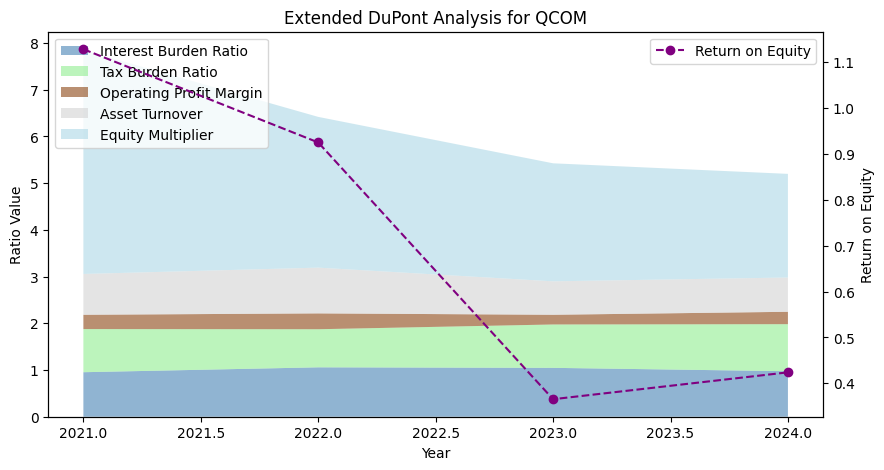

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.pyplot as plt

# ticker = "QCOM"
# Fetch the Extended DuPont Analysis DataFrame
# df = companies.models.get_extended_dupont_analysis()
csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker}/models/{ticker}_extended_dupont_analysis.csv"
df = pd.read_csv(csv_file_path, index_col=0)

# Check the index to see actual row labels
print("Row Labels in DataFrame:", df.index)

# Extract years (excluding the first column which is the index)
years = df.columns[1:].astype(str).astype(int)

# Fetch values using correct labels
interest_burden = df.iloc[0, 1:].values  # First row after index
tax_burden = df.iloc[1, 1:].values
operating_profit_margin = df.iloc[2, 1:].values
asset_turnover = df.iloc[3, 1:].values
equity_multiplier = df.iloc[4, 1:].values
return_on_equity = df.iloc[5, 1:].values  # Last row

# Plot stacked area chart
plt.figure(figsize=(10, 5))
plt.stackplot(years, interest_burden, tax_burden, operating_profit_margin, asset_turnover, equity_multiplier,
              labels=['Interest Burden Ratio', 'Tax Burden Ratio', 'Operating Profit Margin', 'Asset Turnover', 'Equity Multiplier'],
              colors=['#4682B4', '#90EE90', '#8B4513', '#D3D3D3', '#ADD8E6'], alpha=0.6)

# Plot Return on Equity (ROE) on secondary y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(years, return_on_equity, marker='o', linestyle='dashed', color='purple', label='Return on Equity')

# Labels and Title
ax.set_xlabel("Year")
ax.set_ylabel("Ratio Value")
ax2.set_ylabel("Return on Equity")
plt.title(f"Extended DuPont Analysis for {ticker}")

# Legends
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()


Columns: MultiIndex([(            'Value at Risk',      'QCOM'),
            (            'Value at Risk', 'Benchmark'),
            ('Conditional Value at Risk',      'QCOM'),
            ('Conditional Value at Risk', 'Benchmark'),
            (   'Entropic Value at Risk',      'QCOM'),
            (   'Entropic Value at Risk', 'Benchmark'),
            (         'Maximum Drawdown',      'QCOM'),
            (         'Maximum Drawdown', 'Benchmark'),
            (              'Ulcer Index',      'QCOM'),
            (              'Ulcer Index', 'Benchmark'),
            (                    'GARCH',      'QCOM'),
            (                    'GARCH', 'Benchmark'),
            (                 'Skewness',      'QCOM'),
            (                 'Skewness', 'Benchmark'),
            (                 'Kurtosis',      'QCOM'),
            (                 'Kurtosis', 'Benchmark')],
           )
     Value at Risk           Conditional Value at Risk            \
             

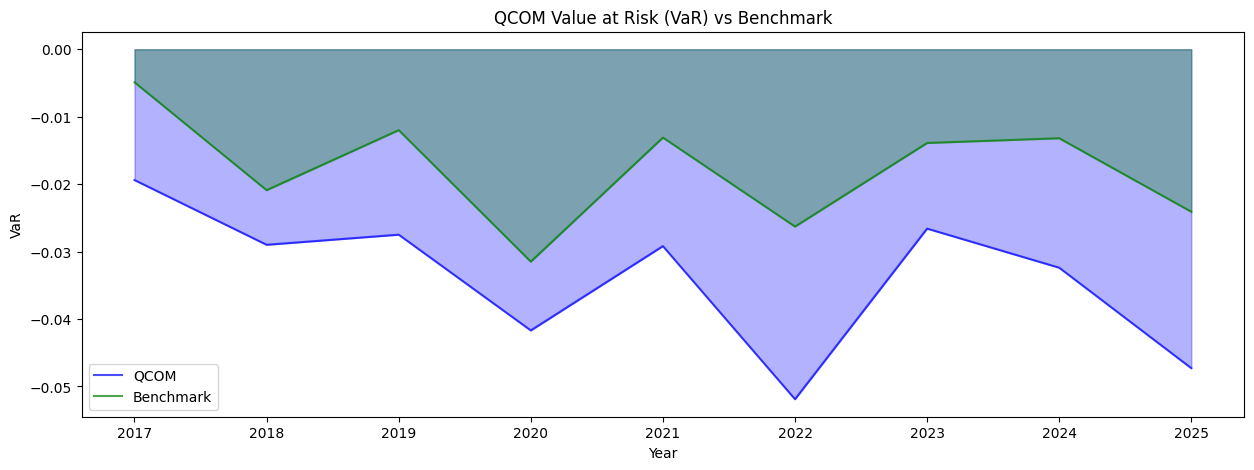

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ticker = "QCOM"
csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker}/risk/{ticker}_risk.csv"

# Read CSV with two header rows
df = pd.read_csv(csv_file_path, header=[0,1], index_col=0)

# Check columns
print("Columns:", df.columns)
print(df.head())

# Convert index (years) to int
df.index = df.index.astype(int)

# Plot QCOM Value at Risk vs Benchmark Value at Risk
plt.figure(figsize=(15,5))
plt.plot(df.index, df[('Value at Risk', 'QCOM')], label=ticker, color='blue', alpha=0.7)
plt.plot(df.index, df[('Value at Risk', 'Benchmark')], label='Benchmark', color='green', alpha=0.7)

# Fill between for better visualization
plt.fill_between(df.index, df[('Value at Risk', 'QCOM')], color='blue', alpha=0.3)
plt.fill_between(df.index, df[('Value at Risk', 'Benchmark')], color='green', alpha=0.3)

# Labels and title
plt.xlabel("Year")
plt.ylabel("VaR")
plt.title("QCOM Value at Risk (VaR) vs Benchmark")
plt.legend()
plt.show()


In [ ]:
def get_efficiency_ratios_value(
        ticker_symbol: Annotated[str, "ticker symbol"],
    ) -> dict:
        """
        Fetches and formats Efficiency Ratios for a given ticker symbol.
        Handles long indicator names and large values.
        """
        # companies = get_companies(ticker_symbol)
        # efficiency_ratios = companies.ratios.collect_efficiency_ratios()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_efficiency.csv"
        efficiency_ratios = pd.read_csv(csv_file_path, index_col=0)

        efficiency_ratios = efficiency_ratios.round(4)

        return efficiency_ratios



In [ ]:
get_efficiency_ratios_value("QCOM")

,2020,2021,2022,2023,2024
Days of Inventory Outstanding,NaN,74.5509,93.7130,146.7797,137.4099
Days of Sales Outstanding,NaN,41.2237,38.0773,44.9678,33.3130
Operating Cycle,NaN,115.7746,131.7903,191.7475,170.7228
Days of Accounts Payable Outstanding,NaN,63.9556,64.1076,65.6443,48.0961
Cash Conversion Cycle,NaN,51.8190,67.6827,126.1031,122.6267
Cash Conversion Efficiency,0.2471,0.3139,0.2058,0.3154,0.3132
Receivables Turnover,NaN,0.1129,0.1043,0.1232,0.0913
Inventory Turnover Ratio,NaN,4.8960,3.8949,2.4867,2.6563
Accounts Payable Turnover Ratio,NaN,5.7071,5.6936,5.5603,7.5890
SGA-to-Revenue Ratio,0.0881,0.0697,0.0581,0.0693,0.0708


In [ ]:
def get_efficiency_ratios_value(
        ticker_symbol: Annotated[str, "ticker symbol"],
        ) -> dict:
        """
        Fetches Efficiency Ratios for a given ticker symbol.
        """
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_efficiency.csv"
        efficiency_ratios = pd.read_csv(csv_file_path, index_col=0)

        return efficiency_ratios

In [ ]:
ratios_data = get_efficiency_ratios_value("NVDA")

# Convert data to table format
years = [str(year) for year in ratios_data.columns]
data = [["Efficiency Ratios"] + years]

for index, row in ratios_data.iterrows():
    formatted_row = []
    for val in row:
        try:
            num = float(val)
            # Convert to exponential format if too large or too precise
            if abs(num) >= 1e6 or abs(num) < 1e-3:
                formatted_val = f"{num:.2e}"
            else:
                formatted_val = f"{num:.4f}"
        except (ValueError, TypeError):
            formatted_val = str(val)  # For non-numeric or missing values
        formatted_row.append(formatted_val)
    data.append([index] + formatted_row)




In [ ]:
data

[['Efficiency Ratios', '2021', '2022', '2023', '2024', '2025'],
 ['Days of Inventory Outstanding',
  'nan',
  '85.6719',
  '121.9599',
  '114.6431',
  '85.8962'],
 ['Days of Sales Outstanding',
  'nan',
  '48.0017',
  '57.3535',
  '41.4176',
  '46.2400'],
 ['Operating Cycle', 'nan', '133.6736', '179.3134', '156.0607', '132.1362'],
 ['Days of Accounts Payable Outstanding',
  'nan',
  '56.6893',
  '46.7481',
  '42.7345',
  '50.3736'],
 ['Cash Conversion Cycle',
  'nan',
  '76.9844',
  '132.5652',
  '113.3262',
  '81.7626'],
 ['Cash Conversion Efficiency',
  '0.3491',
  '0.3384',
  '0.2091',
  '0.4611',
  '0.4911'],
 ['Receivables Turnover', 'nan', '0.1315', '0.1571', '0.1135', '0.1267'],
 ['Inventory Turnover Ratio', 'nan', '4.2604', '2.9928', '3.1838', '4.2493'],
 ['Accounts Payable Turnover Ratio',
  'nan',
  '6.4386',
  '7.8078',
  '8.5411',
  '7.2459'],
 ['SGA-to-Revenue Ratio', '0.1163', '0.0805', '0.0905', '0.0436', '0.0268'],
 ['Fixed Asset Turnover', 'nan', '1.9160', '1.6120', '3

In [ ]:
def get_valuation_ratios_value(
        ticker_symbol: Annotated[str, "ticker symbol"],
        # filing_date: str | datetime
        ) -> dict:
        """
        Fetches Valuation Ratios for a given ticker symbol.
        """


        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        valuation_ratios = pd.read_csv(csv_file_path, index_col=0)

        return valuation_ratios

In [ ]:
ratios_data = get_valuation_ratios_value("NVDA")

# Convert data to table format
years = [str(year) for year in ratios_data.columns]
data = [["Valuation Ratios"] + years]

for index, row in ratios_data.iterrows():
    formatted_row = []
    for val in row:
        try:
            num = float(val)
            # Convert to exponential format if too large or too precise
            if abs(num) >= 1e6 or abs(num) < 1e-3:
                formatted_val = f"{num:.2e}"
            else:
                formatted_val = f"{num:.4f}"
        except (ValueError, TypeError):
            formatted_val = str(val)  # For non-numeric or missing values
        formatted_row.append(formatted_val)
    data.append([index] + formatted_row)




In [ ]:
data

[['Valuation Ratios', '2021', '2022', '2023', '2024', '2025'],
 ['Earnings per Share', '0.1725', '0.3847', '0.1742', '1.1933', '2.9382'],
 ['Revenue per Share', '0.6638', '1.0617', '1.0759', '2.4427', '5.2611'],
 ['Price-to-Earnings',
  '170.2029',
  '37.9517',
  '284.1561',
  '112.5283',
  '33.4282'],
 ['Price-to-Earnings-Growth',
  'nan',
  '30.8375',
  '-519.3860',
  '19.2399',
  '22.8585'],
 ['Book Value per Share', '0.6725', '1.0498', '0.8816', '1.7233', '3.1982'],
 ['Price-to-Book', '43.6580', '13.9074', '56.1479', '77.9203', '30.7106'],
 ['Interest Debt per Share',
  '5.99e+08',
  '5.06e+08',
  '5.46e+08',
  '5.80e+08',
  '5.97e+08'],
 ['CAPEX per Share', '-0.0449', '-0.0385', '-0.0731', '-0.0429', '-0.1305'],
 ['Earnings Yield', '0.0059', '0.0263', '0.0035', '0.0089', '0.0299'],
 ['Dividend Payout Ratio', '0.0912', '0.0409', '0.0911', '0.0133', '0.0114'],
 ['Dividend Yield', '0.0136', '0.0110', '0.0032', '5.00e-04', '1.00e-04'],
 ['Weighted Dividend Yield',
  '5.00e-04',
  '0.0

In [ ]:
def get_balance_sheet_statement(
        ticker_symbol: Annotated[str, "ticker symbol"],
        # filing_date: str | datetime
        ) -> dict:
        """
        Fetches balance sheet statement for a given ticker symbol.
        """


        # companies = get_companies(ticker_symbol)
        # balance_sheet = companies.get_balance_sheet_statement()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/balance_sheet_statement/{ticker_symbol}_balance_sheet_statement.csv"
        balance_sheet = pd.read_csv(csv_file_path, index_col=0)


        return balance_sheet

In [ ]:
ratios_data = get_balance_sheet_statement("NVDA")

# Convert data to table format
years = [str(year) for year in ratios_data.columns]
data = [["Valuation Ratios"] + years]

for index, row in ratios_data.iterrows():
    formatted_row = []
    for val in row:
        try:
            num = float(val)
            # Convert to exponential format if too large or too precise
            if abs(num) >= 1e6 or abs(num) < 1e-3:
                formatted_val = f"{num:.2e}"
            else:
                formatted_val = f"{num:.4f}"
        except (ValueError, TypeError):
            formatted_val = str(val)  # For non-numeric or missing values
        formatted_row.append(formatted_val)
    data.append([index] + formatted_row)




In [ ]:
data

[['Valuation Ratios', '2021', '2022', '2023', '2024', '2025'],
 ['Cash and Cash Equivalents',
  '8.47e+08',
  '1.99e+09',
  '3.39e+09',
  '7.28e+09',
  '8.59e+09'],
 ['Short Term Investments',
  '1.07e+10',
  '1.92e+10',
  '9.91e+09',
  '1.87e+10',
  '3.46e+10'],
 ['Cash and Short Term Investments',
  '1.16e+10',
  '2.12e+10',
  '1.33e+10',
  '2.60e+10',
  '4.32e+10'],
 ['Accounts Receivable',
  '2.43e+09',
  '4.65e+09',
  '3.83e+09',
  '1.00e+10',
  '2.31e+10'],
 ['Inventory', '1.83e+09', '2.60e+09', '5.16e+09', '5.28e+09', '1.01e+10'],
 ['Other Current Assets',
  '2.39e+08',
  '3.66e+08',
  '7.91e+08',
  '3.08e+09',
  '3.77e+09'],
 ['Total Current Assets',
  '1.61e+10',
  '2.88e+10',
  '2.31e+10',
  '4.43e+10',
  '8.01e+10'],
 ['Property, Plant and Equipment',
  '2.86e+09',
  '3.61e+09',
  '4.84e+09',
  '5.26e+09',
  '8.08e+09'],
 ['Goodwill', '4.19e+09', '4.35e+09', '4.37e+09', '4.43e+09', '5.19e+09'],
 ['Intangible Assets',
  '2.74e+09',
  '2.34e+09',
  '1.68e+09',
  '1.11e+09',
  

In [ ]:
!pip install financetoolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.9/411.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
from financetoolkit import Toolkit

In [ ]:
def get_valuation_ratios_value(
        ticker_symbol: Annotated[str, "ticker symbol"],
        # filing_date: str | datetime
        ) -> dict:
        """
        Fetches Valuation Ratios for a given ticker symbol.
        """

        # Fetch the balance sheet data for the specified ticker
        API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        companies = Toolkit([ticker_symbol],api_key=API_KEY)
        # companies = companies
        valuation_ratios = companies.ratios.collect_valuation_ratios()
        if not isinstance(valuation_ratios, pd.DataFrame):
            valuation_ratios = pd.DataFrame(valuation_ratios)

        # Round large numbers to 2 decimal places
        valuation_ratios = valuation_ratios.applymap(
            lambda x: round(x, 2) if isinstance(x, (float, int)) else x
        )


        return valuation_ratios

In [ ]:
get_valuation_ratios_value("NVDA")

Obtaining historical data: 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]


,2021,2022,2023,2024,2025
Earnings per Share,0.17,0.38,0.17,1.19,2.94
Revenue per Share,0.66,1.06,1.08,2.44,5.26
Price-to-Earnings,170.2,37.95,284.16,112.53,46.08
Price-to-Earnings-Growth,NaN,NaN,NaN,NaN,NaN
Book Value per Share,0.67,1.05,0.88,1.72,3.2
Price-to-Book,43.66,13.91,56.15,77.92,42.34
Interest Debt per Share,598870173.62,505671540.87,545951292.49,579737698.99,596551898.73
CAPEX per Share,-0.04,-0.04,-0.07,-0.04,-0.13
Earnings Yield,0.01,0.03,0.0,0.01,0.02
Dividend Payout Ratio,0.09,0.04,0.09,0.01,0.01


NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_0[Period('2021', 'Y-DEC')].plot(kind='hist', bins=20, title=Period('2021', 'Y-DEC'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_1[Period('2022', 'Y-DEC')].plot(kind='hist', bins=20, title=Period('2022', 'Y-DEC'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_2[Period('2023', 'Y-DEC')].plot(kind='hist', bins=20, title=Period('2023', 'Y-DEC'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_3[Period('2024', 'Y-DEC')].plot(kind='hist', bins=20, title=Period('2024', 'Y-DEC'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=Period('2021', 'Y-DEC'), y=Period('2022', 'Y-DEC'), s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=Period('2022', 'Y-DEC'), y=Period('2023', 'Y-DEC'), s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=Period('2023', 'Y-DEC'), y=Period('2024', 'Y-DEC'), s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=Period('2024', 'Y-DEC'), y=Period('2025', 'Y-DEC'), s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_8[Period('2021', 'Y-DEC')].plot(kind='line', figsize=(8, 4), title=Period('2021', 'Y-DEC'))
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_9[Period('2022', 'Y-DEC')].plot(kind='line', figsize=(8, 4), title=Period('2022', 'Y-DEC'))
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_10[Period('2023', 'Y-DEC')].plot(kind='line', figsize=(8, 4), title=Period('2023', 'Y-DEC'))
plt.gca().spines[['top', 'right']].set_visible(False)

NameError: name 'Period' is not defined

from matplotlib import pyplot as plt
_df_11[Period('2024', 'Y-DEC')].plot(kind='line', figsize=(8, 4), title=Period('2024', 'Y-DEC'))
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("ARM", period="5y")

/tmp/ipython-input-7-1490704264.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("ARM", period="5y")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,ARM,ARM,ARM,ARM,ARM
Date,,,,,
2023-09-14,63.590000,66.279999,55.540001,56.099998,130534500
2023-09-15,60.750000,69.000000,60.750000,68.629997,74568900
2023-09-18,58.000000,58.741001,55.020000,57.950001,34571900
2023-09-19,55.169998,56.779999,53.880001,56.250000,18308600
2023-09-20,52.910000,55.400002,51.520000,55.169998,16369500
...,...,...,...,...,...
2025-06-27,165.460007,166.360001,158.759995,159.000000,7495500
2025-06-30,161.740005,168.309998,161.222000,166.964996,5531600


In [ ]:
def get_enterprise_value_breakdown(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Plot the Enterprise Value Breakdown for a single ticker in 2022.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # piotroski_score = companies.models.get_enterprise_value_breakdown().T.dropna()

        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/models/{ticker_symbol}_enterprise_value_breakdown.csv"
        piotroski_score = pd.read_csv(csv_file_path, index_col=0)

        # Filter for the year 2022
        piotroski_score_value = piotroski_score.loc[ "Total Debt"]

        if piotroski_score_value.empty:
            raise ValueError(f"No Total Shareholder Equity data available for ticker {ticker_symbol} in 2022.")

        # Prepare the data for plotting
        # piotroski_score_value.columns = companies._tickers

        # Plot the data
        plt.figure(figsize=(15, 3))
        piotroski_score_value.plot(
            title=f"enterprise value breakdown Total debt",
            grid=True,
            linestyle="-",
            linewidth=2,
            xlabel="Date",
            ylabel="Enterprise Value Breakdown",
            # ylabel="Piotroski Score",
            # stacked=True,
        )

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)  # Hide top spine
        plt.gca().spines["right"].set_visible(False)  # Hide right spine
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_enterprise_value_breakdown.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Enterprise Value Breakdown saved to <img {plot_path}>"

In [ ]:
get_enterprise_value_breakdown("QCOM")

'Enterprise Value Breakdown saved to <img QCOM_enterprise_value_breakdown.png>'

In [ ]:
def get_weighted_average_cost_of_capital(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Fetch and Plot the Weighted average cost of capital for a single ticker in 2022.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # piotroski_score = companies.models.get_weighted_average_cost_of_capital().T.dropna()

        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/models/{ticker_symbol}_weighted_average_cost_of_capital.csv"
        piotroski_score = pd.read_csv(csv_file_path, index_col=0)

        # Filter for the year 2022
        piotroski_score_value = piotroski_score.loc[ "Weighted Average Cost of Capital"]

        if piotroski_score_value.empty:
            raise ValueError(f"No Total Shareholder Equity data available for ticker {ticker_symbol} in 2022.")

        # Prepare the data for plotting
        # piotroski_score_value.columns = companies._tickers

        # Plot the data
        plt.figure(figsize=(15, 3))
        piotroski_score_value.plot.bar(
            title=f"weighted_average_cost_of_capital",
            grid=True,
           color="skyblue",
            rot=0,
            ylim=(0, 0.6),
            # ylabel="Piotroski Score",
            # stacked=True,
        )

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)  # Hide top spine
        plt.gca().spines["right"].set_visible(False)  # Hide right spine
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_weighted_average_cost_of_capital.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Weighted Average Cost of Capital saved to <img {plot_path}>"


In [ ]:
get_weighted_average_cost_of_capital("QCOM")

'Weighted Average Cost of Capital saved to <img QCOM_weighted_average_cost_of_capital.png>'

In [ ]:
def get_price_to_earnings_growth_ratio(
        ticker_symbol: Annotated[str, "Ticker symbol of the stock (e.g., 'AAPL' for Apple')"],
        # save_path: Annotated[str, "File path where the chart image should be saved"],
    ) -> str:
        """
        Plot the price to earning growth ratio for a single ticker in 2022.
        """
        # Fetch the balance sheet data for the specified ticker
        # API_KEY = "ULn8J24FAp8SZFGNzUVj4cpY4fWVCTBl"
        # companies = get_companies(ticker_symbol)
        # piotroski_score = companies.ratios.get_price_to_earnings_growth_ratio().T.dropna()
        csv_file_path = f"/content/drive/MyDrive/database_finance/{ticker_symbol}/ratios/{ticker_symbol}_valuation.csv"
        valuation_ratios= pd.read_csv(csv_file_path, index_col=0)

        # Filter for the year 2022
        return_on_rows = [
            "Price-to-Earnings-Growth",

        ]
        df = valuation_ratios.loc[valuation_ratios.index.intersection(return_on_rows)]

        # Transpose so years are on x-axis
        df = df.T.dropna(how='all')  # Drop columns (years) that are all NaN
        df.index = df.index.astype(str)



        # piotroski_score_value = piotroski_score.loc[
        #     :, "Piotroski Score", :
        # ].T

        # if piotroski_score.empty:
        #     raise ValueError(f"No Total Shareholder Equity data available for ticker {ticker_symbol} in 2022.")

        # Prepare the data for plotting
        # piotroski_score.columns = companies._tickers

        # Plot the data
        plt.figure(figsize=(15, 3))
        df.plot(
            title=f"price to earnings growth ratio",
            grid=True,
            linestyle="-",
            linewidth=2,
            xlabel="Date",
            ylabel="PEG Ratio",
            # ylabel="Piotroski Score",
            # stacked=True,
        )

        # Style adjustments
        plt.gca().spines["top"].set_visible(False)  # Hide top spine
        plt.gca().spines["right"].set_visible(False)  # Hide right spine
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()

        # Save the plot
        plot_path  = (
            f"{ticker_symbol}_price_to_earnings_growth_ratio.png"
            # if os.path.isdir(save_path)
            # else save_path
        )
        plt.savefig(plot_path)
        plt.close()

        return f"Price to earning Growth Ratio saved to <img {plot_path}>"


In [ ]:
get_price_to_earnings_growth_ratio("QCOM")

'Price to earning Growth Ratio saved to <img QCOM_price_to_earnings_growth_ratio.png>'

<Figure size 1500x300 with 0 Axes>